# ML i wstęp do sieci neuronowych

In [344]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error

In [345]:
data = np.loadtxt('SGD_data.txt', delimiter=',')
Y = data[:, 0]
X = np.array([(x-32)*5/9 for x in data[:, 1]])

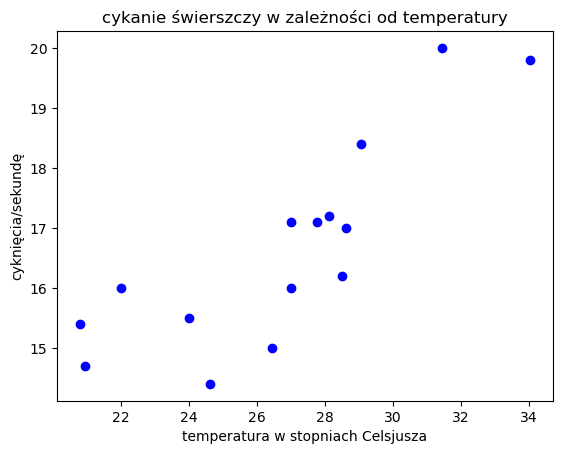

In [346]:
plt.scatter(X, Y, marker='o', c='b')
plt.title('cykanie świerszczy w zależności od temperatury')
plt.ylabel('cyknięcia/sekundę')
plt.xlabel('temperatura w stopniach Celsjusza')
plt.show()

In [347]:
samples_cnt = len(X)
a = 10.0 # inicjalizacja wag
b = 10.0 #
learning_rate = 0.001 # rozmiar stałej uczenia
maxIteration = 1000 # liczba iteracji

**Zadanie 1: uzupełnij listę wartości tak, aby dla każdej temperatury wyznaczyć liczbę cyknięć świerszczy przy użyciu aktualnych wag modelu liniowego**

**Zadanie 2: napisz kod, który iteracyjnie będzie poprawiać wagi, by wyznaczyły model najlepiej odwzorowujący zależność liczby cyknięć od temperatury**

In [348]:
a_list = []
b_list = []
y_list = []
p_list = []
for i in range(maxIteration):
    #Zadanie1: 
    predicted_values = a * X + b
    
    #Zadanie2:
    a = a - learning_rate * np.mean((predicted_values - Y) * X)
    b = b - learning_rate * np.mean(predicted_values - Y)
    
    # dodanie wartości do list w celu późniejszej wizualizacji, nie modyfikować!
    a_list.append(b)
    b_list.append(a)
    y_list.append(mean_squared_error(Y, predicted_values))
    p_list.append(predicted_values)

In [349]:
print(predicted_values)
print(a)
print(b)

[17.97812544 15.45744597 18.67501985 17.34054249 16.79192333 15.99123669
 15.17572274 16.99950893 15.13124084 17.19226722 16.64364807 17.08847386
 16.79192333 17.22192182 16.15434038]
0.2668975180388346
9.585690218450178


### Zobaczmy jak wyglądała aktualizacja wag i jak dopasowywała się ostateczna prosta

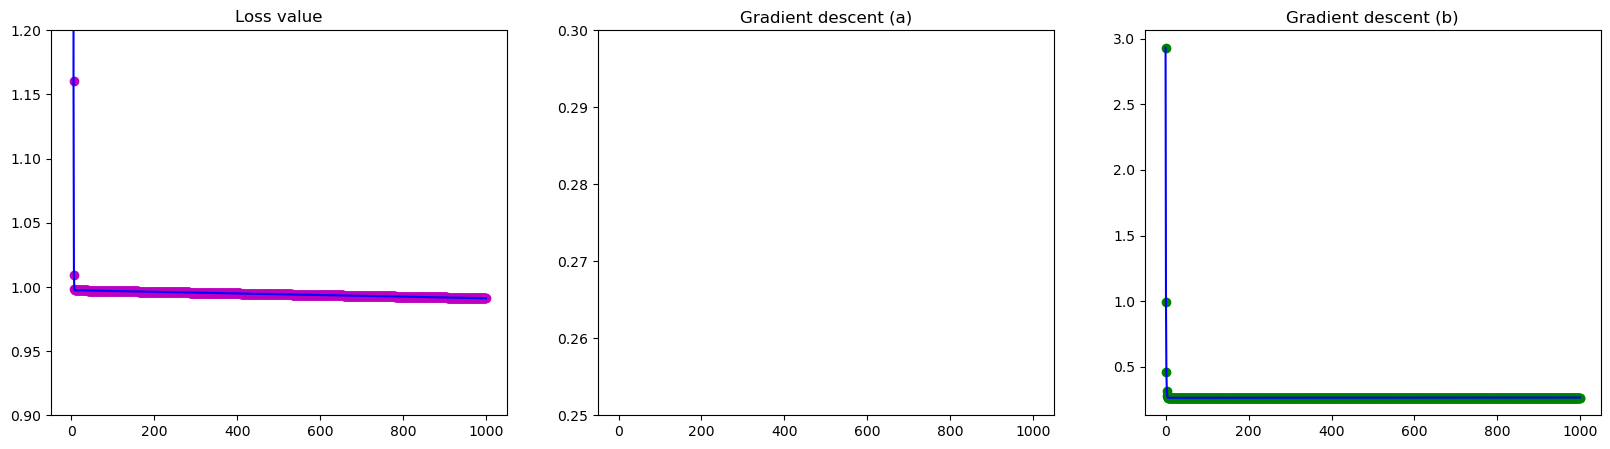

Computed weights values -> w0: 0.2668975180388346 w1: 9.585690218450178


In [350]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
plt.ylim(.9, 1.2)
plt.scatter(range(maxIteration),y_list,c="m")
plt.plot(range(maxIteration),y_list,c="b")
plt.title("Loss value")

plt.subplot(1,3,2)
plt.ylim(.25, .3)
plt.scatter(range(maxIteration),a_list,c="r")
plt.plot(range(maxIteration),a_list,c="b")
plt.title("Gradient descent (a)")

plt.subplot(1,3,3)
plt.scatter(range(maxIteration),b_list,c="g")
plt.plot(range(maxIteration),b_list,c="b")
plt.title("Gradient descent (b)")

plt.show()
print("Computed weights values -> w0:", a, "w1:", b)

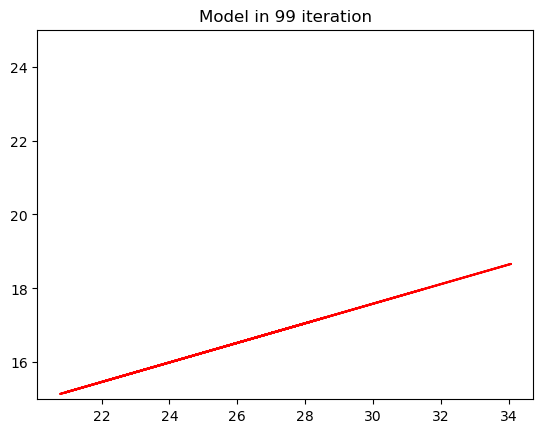

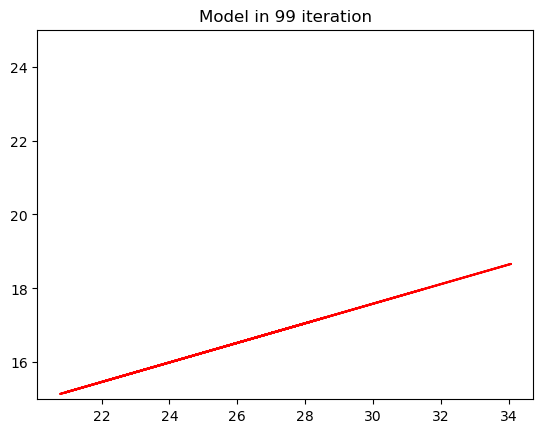

In [351]:
from IPython import display
for i in range(100):
    plt.clf()
    plt.plot(X, p_list[i],"r-")
    plt.title(f"Model in {i} iteration")
    plt.ylim(15, 25)
    display.clear_output(wait=True)
    display.display(plt.gcf())

**Zadanie 3. Po przeczytaniu dokumentacji biblioteki scikit-learn stwórz klasyfikatory regresji logistycznej (Logistic Regression) oraz MLP (Multi-Layer Perceptron), naucz je na podstawie zbioru digits i użyj do rozpoznawania cyfr w zbiorze  testowym, etykiety umieść w zmiennych predicted_logreg i predicted_mlp. Spróbuj pomodyfikować parametry obu klasyfikatorów i zobacz czy można doprowadzić do sytuacji, gdy jeden będzie działał zdecydowanie lepiej od drugiego**

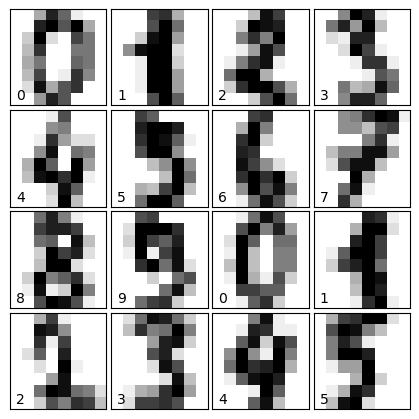

In [352]:
import itertools
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

#%matplotlib inline
digits = load_digits() #zbiór zawiera 1797 obrazków reprezentujących cyfry od 0 do 9
fig = plt.figure(figsize = (4,4))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#wyświetlanie 16 obrazków z ich etykietami
for i in range(16):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))
    
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=16)

#deklaracja
mlp =  MLPClassifier(random_state=1, max_iter=10000).fit(X_train, y_train)
logreg = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)

#uczenie
mlp_score = mlp.score(X_test, y_test)
logreg_score = logreg.score(X_test, y_test)

#prognoza
predicted_mlp = mlp.predict(X_test)
predicted_logreg = logreg.predict(X_test)


[[34  0  1  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  1]
 [ 0  2 33  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  1  0]
 [ 0  2  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  1 29  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  2  1  0 40  1  0]
 [ 0  0  0  0  1  1  0  1 33  0]
 [ 0  0  0  0  0  0  0  0  1 34]]
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  1  0]
 [ 0  1 33  0  0  0  0  0  1  0]
 [ 0  0  0 36  0  0  0  0  1  0]
 [ 0  1  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  1 28  0  0  1  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  1]
 [ 0  1  0  1  0  1  0  0 33  0]
 [ 0  0  0  1  0  0  0  0  0 34]]


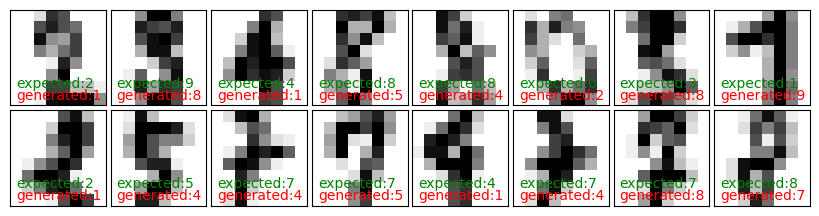

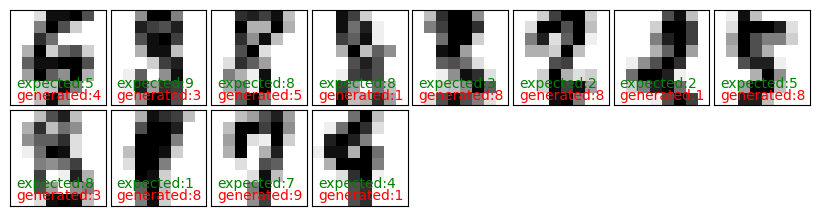

In [353]:
if predicted_logreg is not None:
    print(confusion_matrix(y_test,predicted_logreg))
    expected = y_test
    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    cnt = 0
    for i in range(len(X_test)):
        if predicted_logreg[i] != expected[i]:
            ax = fig.add_subplot(8, 8, cnt + 1, xticks=[], yticks=[])
            ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
            cnt += 1
            ax.text(0, 7, "generated:" + str(predicted_logreg[i]), color='red')
            ax.text(0, 6, "expected:" + str(expected[i]), color='green')
            
    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    cnt = 0
    for i in range(len(X_test)):    
        if predicted_mlp[i] != expected[i]:
            bx = fig.add_subplot(8, 8, cnt + 1, xticks=[], yticks=[])
            bx.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
            cnt += 1
            bx.text(0, 7, "generated:" + str(predicted_mlp[i]), color='red')
            bx.text(0, 6, "expected:" + str(expected[i]), color='green')
    print(confusion_matrix(y_test,predicted_mlp))

### Zobaczmy na które fragmenty klasyfikator LogisticRegression zwraca uwagę

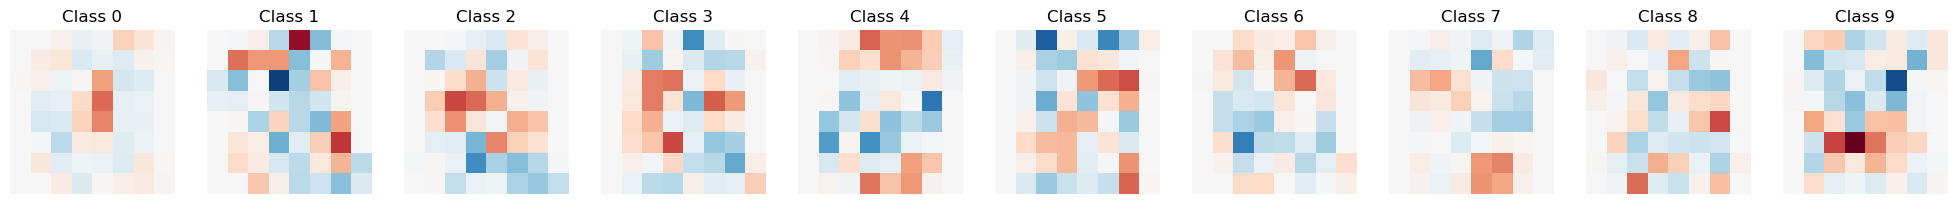

In [354]:
scale = np.max(np.abs(logreg.coef_))

p = plt.figure(figsize=(25, 2.5));

for i in range(10):
    p = plt.subplot(1, 10, i + 1)
    p = plt.imshow(logreg.coef_[i].reshape(8, 8),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %i' % i);

### Tensorflow Playground. Zajrzyj na stronę [playground.tensorflow.org](http://playground.tensorflow.org).

**Zadanie 4. Ustaw minimalną sieć o zerowej liczbie warstw ukrytych (0 hidden layers; nie zmieniaj kolumny features) i naucz ją na problemie nr 3 (dwie grupy) - spójrz na wizualizację i wykres błędu treningowego i testowego - czy taka sieć (pojedynczy neuron) nauczyła się odpowiedniej granicy decyzyjnej? Zmień problem na pierwszy i naucz sieć jeszcze raz - na czym polega różnica i dlaczego? Jak sprawić by efekt znów był zadowalający?**

1. Jeden neuron starczy to wyznaczenia granicy dezycyjnej w problemie nr3:
2. W nr1 problemie jeden neuron nie wystarczy do wyznaczenia granicy decyzyjne, roznica jest zbior danych gdzie jeden neuron probuje wyznaczyc prosta linie w zbiorze ktory nie moze byc tak wyznaczony, w przypadku dodaniu wiecej nueronow, zosgtanie wyznaczony babel zamiast prostej lini.

**Zadanie 5. Spróbuj przeuczyć sieć w środowisku tensorflow playground. Wyjaśnij jak do tego doprowadzić i po czym rozpoznać jej przeuczenie.**

1. Do przeuczenia mozna doprowadzic poprzez dodawania wiele ukrytych sieci neuronowych przez co widac na wizualizacji iz linia jest prowadzona od puntku do punktu.